In [1]:
import torch as th 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import *

In [ ]:
A = th.Tensor([[1,2,3]])
B = th.Tensor([[4,5,6],[7,8,9]])

In [2]:
L = th.nn.CrossEntropyLoss()

In [103]:
def cel(x, y):
    # x and y have shapes (N,N,2), where for each (i,j) entry, x[i,j,:] is the
    # predicted logits for the i-th sample, and y[i,j,:] is the true label.
    # The output is a (N,N) matrix, where for each (i,j) entry, the output[i,j]
    # is the cross-entropy loss for the i-th sample.
    
    # multiply np.log(x) by y across the last dimension
    _ = np.apply_along_axis(lambda x: np.log(x) * y, -1, x)
    # sum across the last dimension
    _ = np.apply_along_axis(np.sum, -1, _)
    # multiply by -1
    _ = -1 * _
    return _
    

In [115]:
i = 10
j = 10

th.tensor([X[i,j,:]]), th.tensor(Y[i,j,:])

/tmp/ipykernel_55993/262572602.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811740025/work/torch/csrc/utils/tensor_new.cpp:201.)
  th.tensor([X[i,j,:]]), th.tensor(Y[i,j,:])


(tensor([[0.2100, 0.0100]], dtype=torch.float64),
 tensor([0.2100, 0.0000], dtype=torch.float64))

In [124]:
x, y = np.linspace(0.01, 0.99, 50), np.linspace(0.01, 0.99, 50)
X, Y = np.meshgrid(x, y)
# stack a 2d array of zeros to 0 to X
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        x_ = x[i]
        y_ = y[j]
        Z[i,j] = L(th.tensor([[x_,y_]]), th.tensor([0]))

In [109]:
Y.shape

(50, 50, 2)

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

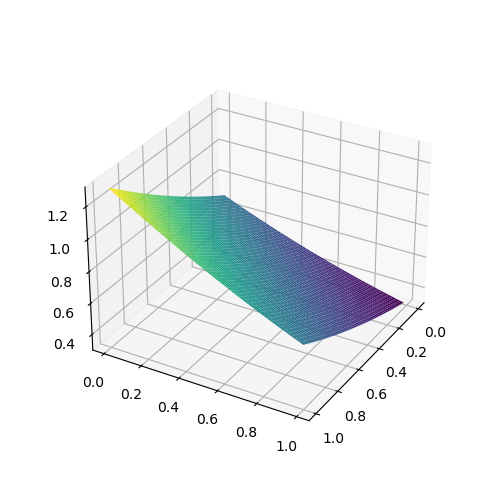

In [126]:
%matplotlib ipympl
# plot a 3D surface
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

def update_view(elev=30, azim=30):
    ax.view_init(elev, azim)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()

interact(update_view, elev=(-90, 90), azim=(-180, 180));